# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [75]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup 
import matplotlib.pyplot as plt
import pandas as pd
import requests
import numpy as np


In [76]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [77]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"

#use the browser to visit the site
browser.visit(url)

In [78]:
# Request to website and download HTML contents

req=requests.get(url)
content=req.text

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [79]:
# Create a Beautiful Soup Object
soup = BeautifulSoup(content, "html.parser")

In [80]:
#print the parsed data from HTML
print(soup.prettify())

<!DOCTYPE html>
<html lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <meta content="" name="description"/>
  <title>
   Mars Temperature Data
  </title>
  <link href="css/bootstrap.min.5.2.2.css" rel="stylesheet" type="text/css"/>
  <link href="css/temp.css" rel="stylesheet" type="text/css"/>
 </head>
 <body>
  <main>
   <div class="container py-4">
    <header class="pb-3 mb-4 border-bottom">
     <a class="d-flex align-items-center text-dark text-decoration-none" href="/">
      <span class="fs-4">
       Mission To Mars
      </span>
     </a>
    </header>
    <div class="p-5 mb-4 bg-light rounded-3">
     <div class="container-fluid py-5">
      <h1 class="display-5 fw-bold">
       Mars Temperature Data
      </h1>
      <p class="col-md-8 fs-4">
       This is Mars data.
      </p>
      <table class="table">
       <tr>
        <th>
         id
        </th>
        <th>
         terrestrial_date
        </

In [81]:
# Extract all rows of data
all_data = soup.find_all()


In [82]:
#find entire table
table = soup.find('table',class_='table')
print(table)

<table class="table">
<tr>
<th>id</th>
<th>terrestrial_date</th>
<th>sol</th>
<th>ls</th>
<th>month</th>
<th>min_temp</th>
<th>pressure</th>
</tr>
<tr class="data-row">
<td>2</td>
<td>2012-08-16</td>
<td>10</td>
<td>155</td>
<td>6</td>
<td>-75.0</td>
<td>739.0</td>
</tr>
<tr class="data-row">
<td>13</td>
<td>2012-08-17</td>
<td>11</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>24</td>
<td>2012-08-18</td>
<td>12</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>741.0</td>
</tr>
<tr class="data-row">
<td>35</td>
<td>2012-08-19</td>
<td>13</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>732.0</td>
</tr>
<tr class="data-row">
<td>46</td>
<td>2012-08-20</td>
<td>14</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>57</td>
<td>2012-08-21</td>
<td>15</td>
<td>158</td>
<td>6</td>
<td>-78.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>68</td>
<td>2012-08-22</td>
<td>16</td>
<td>158</td>
<td>6</td>
<td>-77.

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [83]:
#ref https://medium.com/analytics-vidhya/how-to-scrape-a-table-from-website-using-python-ce90d0cfb607

# Create an empty list
headers = []

#obtains every title of the columns with tag <th>
for t in table.find_all('th'):
    title = t.text
    headers.append(title)

headers
  
    

['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']

In [84]:
#create dataframe 
mars_df = pd.DataFrame(columns=headers)
print(mars_df)

Empty DataFrame
Columns: [id, terrestrial_date, sol, ls, month, min_temp, pressure]
Index: []


In [85]:
#extract Table Data.  Need a loop to first find all the tr tags
#then we need a loop to find all the td tags.  

rows = table.find_all("tr", class_="data-row")

#to ignore the TH values, we use rows with class_="data-row"
#This gives us only the rows excluding the header.

#Loop through each row in the list
for i in rows:
    #in that row look for the TD or individual cell values

    data = i.find_all("td") 
    
    #the row will be marked by a tr and an end tr.  Take the DATA 
    # in text form found between these two trs
    #once it finds the text between the two trs it moves on.
    row = [tr.text for tr in data]    
    
    
    #we need to put it into a list
       
    #add info to the dataframe in a loop
    #in order to add the data to the next line, we need to count the 
    #current data frame  Len(df)will go back to the index and add a row
    
    l=len(mars_df)
    
    #Once the loop has gone through and pulled the text associated
    #with the row.  This is telling you that one L is calculated it 
    #will be the row.  So add the data there and start over.
    
    mars_df.loc[l] = row

print(mars_df)
    



        id terrestrial_date   sol   ls month min_temp pressure
0        2       2012-08-16    10  155     6    -75.0    739.0
1       13       2012-08-17    11  156     6    -76.0    740.0
2       24       2012-08-18    12  156     6    -76.0    741.0
3       35       2012-08-19    13  157     6    -74.0    732.0
4       46       2012-08-20    14  157     6    -74.0    740.0
...    ...              ...   ...  ...   ...      ...      ...
1862  1889       2018-02-23  1973  133     5    -78.0    730.0
1863  1892       2018-02-24  1974  134     5    -77.0    729.0
1864  1894       2018-02-25  1975  134     5    -76.0    729.0
1865  1893       2018-02-26  1976  135     5    -77.0    728.0
1866  1895       2018-02-27  1977  135     5    -77.0    727.0

[1867 rows x 7 columns]


In [86]:
# Confirm DataFrame was created successfully
mars_df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [87]:
# Examine data type of each column
mars_df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [88]:
#change terrestrial_dat to datetime64[ns]
mars_df["terrestrial_date"] = pd.to_datetime(mars_df["terrestrial_date"])

#sol,ls & month to integer
mars_df["sol"] = pd.to_numeric(mars_df["sol"])
mars_df["ls"] = pd.to_numeric(mars_df["ls"])
mars_df["month"] = pd.to_numeric(mars_df["month"])

#min_temp & Pressure to float64
mars_df["min_temp"] = pd.to_numeric(mars_df["min_temp"])
mars_df["pressure"] = pd.to_numeric(mars_df["pressure"])
mars_df.dtypes

id                          object
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?  

A:  We do not indicate the number of months on Mars in our dataset.  From our knowledge of finishing this data analysis, there are approximately 687 earth days in a Mars year.  If we took the idea of a month being equal to 28 days, we would determine that there are 24 and a half earth months on Mars.  This information was confirmed by the Mars Calendar at interimm.org.  
	
As can be seen on the Royal Museum of Greenwich's website, a day on Mars is 40 minutes longer than that of a day on earth.  This is based on the Solar day (sol).  This is the time it takes to rotate on an axis and come back the same position in the day.  Therefore, it would be safe to say that Mars has 24 months in each calendar year.  For the purposes of this analysis, the calendar years used were that of the earths.  If the day are the same on Earth and on Mars, why does the Earth have less days in its calendar year than Mars?  Calendar years are based on one revolution around the sun.  Mars is further away from sun and it's trip takes approximately twice as long as the Earth.  
	
References:
https://www.rmg.co.uk/stories/topics/how-long-day-on-mars#:~:text=year%20on%20Mars%3F-,Mars%20is%20a%20planet%20with%20a%20very%20similar%20daily%20cycle,than%20a%20day%20on%20Earth.
	
https://interimm.org/mars-clock/en/cal-doc.html#:~:text=In%20general%2C%20there%20are%2024,or%20Spring%20Equinox%20on%20Mars.
    
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
	
A:  The number of Martian and Earth days are equivalent as can be seen in the mars_df dataframe.  Therefore, there are 1867 Mars days.
  	

3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:

A: From the average minimum temperature, it was determined that the temperature was the coldest month was the third at -83.3°C with the fourth month being the second coldest at -82.7°C.  The warmest month on Mars was the 8th month at -68.4°C.  Although we generally have a lot warmer temperatures on Earth, the Coldest temperautre recorded on earth was -89.2°C.  Fortunately, these tempeartures are isolated to places such as the Antartica.

Reference
https://wmo.asu.edu/content/world-lowest-temperature
	

4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
	
A:  The month is the highest atmospheric pressure was the 9th month with 913.3 mmHg whereas the lowest was the 6th month with 745.1 mmHg.  

5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:

A:  We can see in the graph above that at approximately 500 days we get a lowest peak or winter peak.  From the terr_sort_df we can get an approximate sol = 535.  The next peak occurs about 1200-1250.  From this we get a sol from 1219 to 1237.  The mid point is 1224.  The difference between these two points is 689.  From the NASA "Mars: The Red Planet" website, it was confirmed that a Mars year is equivalent to 687 earth days. 

Reference
(ttps://solarsystem.nasa.gov/planets/mars/in-depth/#:~:text=Rotation-,Orbit%20and%20Rotation,same%20as%20687%20Earth%20days.)


In [112]:
#total sum of months with the index showing the month number.  
#the sort was done on the index.  The counts are for total tests in that 
#month

month_df = mars_df['month'].value_counts()
month_df.sort_index(ascending=True)




1     174
2     178
3     192
4     194
5     149
6     147
7     142
8     141
9     134
10    112
11    138
12    166
Name: month, dtype: int64

In [90]:
# 2. How many Martian days' worth of data are there?

len(mars_df.index)

#there are 1867 Martian Days woth of data.  Technically we are usuing Earth
#days to measure time on Mars

1867

In [91]:
#plot the average minimum daily temperature per month.  
#use group by method slicing the result for the mininum temp
#to get the mean each month

avg_temp_df = mars_df.groupby('month')['min_temp'].mean()
avg_temp_df

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

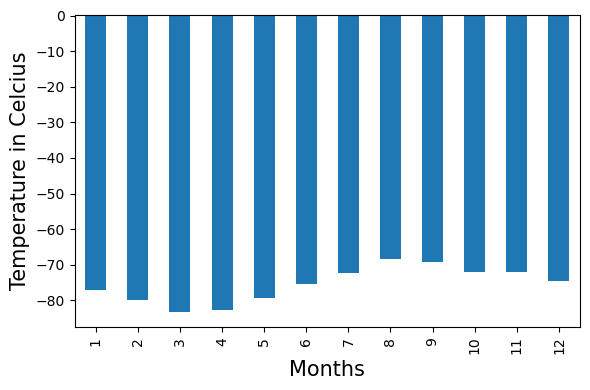

In [92]:
bar_chart = avg_temp_df.plot(kind="bar", figsize=(6,4))
bar_chart.set_xlabel("Months", fontsize=15)
bar_chart.set_ylabel("Temperature in Celcius", fontsize=15)


plt.savefig("output/avg_temp_on_mars.png")
plt.tight_layout()
plt.show()

In [93]:
#sort values in temps

cold_month_df = avg_temp_df.sort_values(ascending=True)
cold_month_df

month
3    -83.307292
4    -82.747423
2    -79.932584
5    -79.308725
1    -77.160920
6    -75.299320
12   -74.451807
7    -72.281690
11   -71.985507
10   -71.982143
9    -69.171642
8    -68.382979
Name: min_temp, dtype: float64

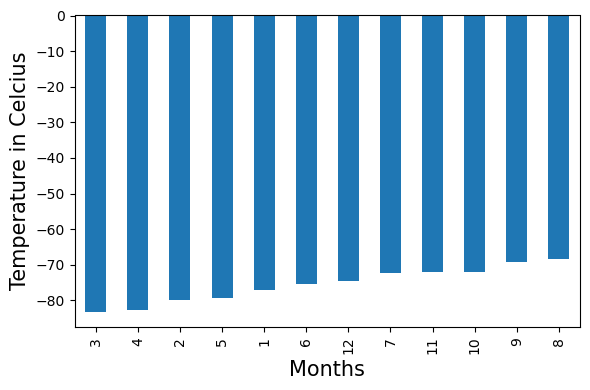

In [94]:
bar_chart = cold_month_df.plot(kind="bar", figsize=(6,4))
bar_chart.set_xlabel("Months", fontsize=15)
bar_chart.set_ylabel("Temperature in Celcius", fontsize=15)


plt.savefig("output/cold_month_on_mars.png")
plt.tight_layout()
plt.show()

In [95]:
# 4. Average pressure by Martian month


avg_press_df = mars_df.groupby('month')['pressure'].mean()
avg_press_df

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

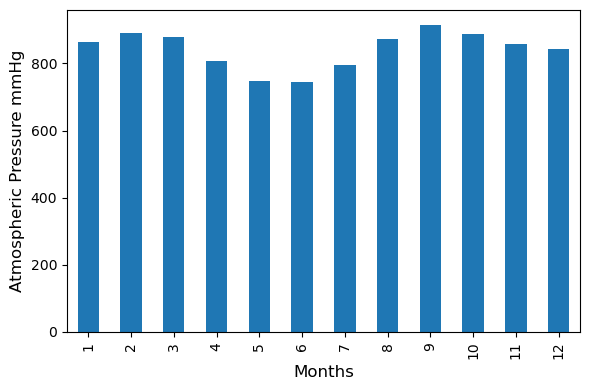

In [111]:
bar_chart = avg_press_df.plot(kind="bar", figsize=(6,4))
bar_chart.set_xlabel("Months", fontsize=12)
bar_chart.set_ylabel("Atmospheric Pressure mmHg", fontsize=12)


plt.savefig("output/avg_pressure_on_mars.png")
plt.tight_layout()
plt.show()

In [97]:
#make dataframe with sol and min_temp

terr_df = mars_df[['sol','min_temp']]
terr_df


,sol,min_temp
0,10,-75.0
1,11,-76.0
2,12,-76.0
3,13,-74.0
4,14,-74.0
...,...,...
1862,1973,-78.0
1863,1974,-77.0
1864,1975,-76.0
1865,1976,-77.0


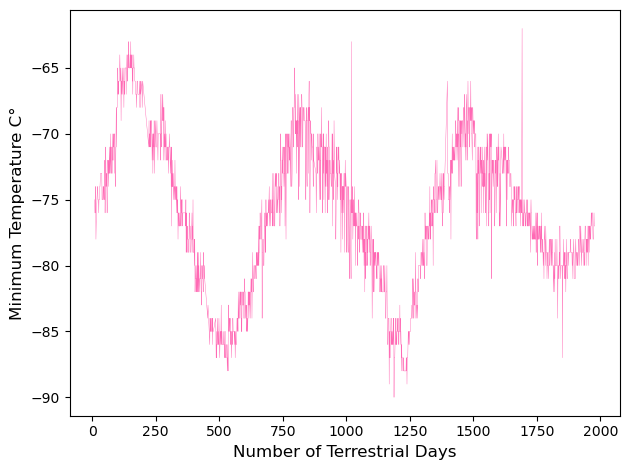

In [98]:
#use plot(x,y) to create a line chart

plt.plot(terr_df['sol'],terr_df['min_temp'], c='hotpink', linewidth=0.3)
plt.xlabel('Number of Terrestrial Days', fontsize=12)
plt.ylabel('Minimum Temperature C°', fontsize=12)

plt.savefig("output/mintempvsterrdays.png")
plt.tight_layout()
plt.show()


In [108]:
#sort values from coolest to warmest so we can see what the span is
#sort the terr dataframe using the min_temp column

terr_sort = terr_df.sort_values(by=['min_temp'])
terr_sort.head(30)



,sol,min_temp
1093,1188,-90.0
1144,1239,-89.0
1074,1169,-89.0
1142,1237,-88.0
1140,1235,-88.0
1139,1234,-88.0
1138,1233,-88.0
1137,1232,-88.0
1136,1231,-88.0
1135,1230,-88.0


In [109]:
# Write the data to a CSV
mars_df.to_csv("output/mars.csv")

In [110]:
browser.quit()